##### Задание 1. 
В зале суда есть 5 присяжных, каждый из них по отдельности с вероятностью 70% может правильно определить, виновен подсудимый или нет. С какой вероятностью они все вместе вынесут правильный вердикт, если решение принимается большинством голосов?

* 70.00%
* 83.20%
* 83.70%
* 87.50%

Теперь перейдем непосредственно к машинному обучению.

Формула

`N` - количество присяжных

`p` - вероятность правильного решения присяжного

`u` - вероятность правильного решения всего жюри

`m` - минимальное большинство членов жюри, `m = floor(N / 2) + 1`

`C(i,N)` - количество сочетаний из `N` по `i`

`u = sum([C(i,N) * p**i * (1 - p)**(N - i) for i in range(m, N)])`

In [28]:
%load_ext nb_black
import math

<IPython.core.display.Javascript object>

In [29]:
def C(i, N):
    return math.factorial(N) / math.factorial(N - i) / math.factorial(i)

<IPython.core.display.Javascript object>

In [30]:
N = 5
p = 0.7
m = math.floor(N / 2) + 1

<IPython.core.display.Javascript object>

In [31]:
u = sum([C(i, N) * p ** i * (1 - p) ** (N - i) for i in range(m, N + 1)])

<IPython.core.display.Javascript object>

In [32]:
u * 100

83.692

<IPython.core.display.Javascript object>

##### Задание 2 (Опциональное задание).
Сделайте интервальную оценку среднего возраста (age) для клиентов, которые просрочили выплату кредита, с 90% "уверенностью".(Использовать приложенный файл с данными)  
(То есть нужно расчитать в каком интервале с вероятностью 90% будет лежать среднее значение возраста случайной выборки для пользователей которые просрочили кредит и нет) 

Данные в файле `credit_scoring_sample.csv`

Данные представлены следующим образом:

**Прогнозируемая переменная**

SeriousDlqin2yrs – Человек не выплатил данный кредит в течение 90 дней; возможные значения 1/0

**Независимые признаки**

age – Возраст заёмщика кредитных средств; тип - integer  
NumberOfTime30-59DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 30-59 дней,  но не больше в течение последних двух лет; тип - integer  
DebtRatio – Ежемесячный отчисления на задолжености(кредиты,алименты и т.д.) / совокупный месячный доход percentage; тип - real  
MonthlyIncome – Месячный доход в долларах; тип - real  
NumberOfTimes90DaysLate – Количество раз, когда человек имел просрочку выплаты других кредитов более 90 дней; тип - integer  
NumberOfTime60-89DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 60-89 дней,   но не больше в течение последних двух лет; тип - integer  
NumberOfDependents – Число человек в семье кредитозаёмщика; тип - integer  

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

In [34]:
df = pd.read_csv("credit_scoring_sample.csv", sep=";")
df.head()b

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


<IPython.core.display.Javascript object>

In [38]:
df.shape

(45063, 8)

<IPython.core.display.Javascript object>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
SeriousDlqin2yrs                        45063 non-null int64
age                                     45063 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    45063 non-null int64
DebtRatio                               45063 non-null float64
NumberOfTimes90DaysLate                 45063 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    45063 non-null int64
MonthlyIncome                           36420 non-null float64
NumberOfDependents                      43946 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


<IPython.core.display.Javascript object>

In [40]:
df.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
count,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,3.642000e+04,43946.000000
mean,0.222489,51.210949,0.750993,352.062688,0.570712,0.505870,6.452263e+03,0.789628
std,0.415922,14.651533,6.184521,2467.556358,6.173106,6.153609,1.263817e+04,1.130813
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,40.000000,0.000000,0.176373,0.000000,0.000000,3.286000e+03,0.000000
50%,0.000000,51.000000,0.000000,0.373949,0.000000,0.000000,5.166000e+03,0.000000
75%,0.000000,62.000000,0.000000,0.857027,0.000000,0.000000,8.000000e+03,1.000000
max,1.000000,107.000000,98.000000,326442.000000,98.000000,98.000000,1.794060e+06,10.000000


<IPython.core.display.Javascript object>

In [45]:
df_clean = df.dropna()
df_clean.shape

(36420, 8)

<IPython.core.display.Javascript object>

Для расчета, необходимо:

1) Найти 5000 случайных выборок возраста пользователей которые выплатили кредит и не выплатили(2 цифры)

2) Найти средние данных выборок(5000 средних для пользователей, которые выплатили и 5000 для пользователей, которые не выплатили)

3) Посчитать интервал в котором лежат 90% средних(должно получиться 2 интервала)

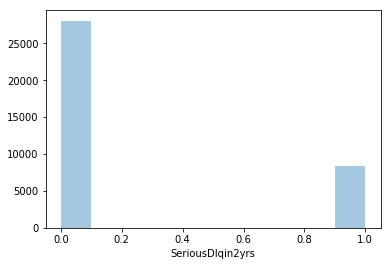

<IPython.core.display.Javascript object>

In [46]:
sns.distplot(df_clean["SeriousDlqin2yrs"], bins=10, kde=False)
plt.show()

In [47]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), n_samples)
    samples = data[indices]
    return samples

<IPython.core.display.Javascript object>

In [64]:
debtors = df_clean[df_clean["SeriousDlqin2yrs"] == 1].age
paid = df_clean[df_clean["SeriousDlqin2yrs"] == 0].age

<IPython.core.display.Javascript object>

In [76]:
def get_samples(data, n, n_samples):
    samples = []
    for i in range(n):
        sample = [item for item in get_bootstrap_samples(data, n_samples)]
        samples.append(sample)
    return samples

<IPython.core.display.Javascript object>

In [86]:
len(debtors)

8357

<IPython.core.display.Javascript object>

In [84]:
debtors_samples = get_samples(debtors.values, 5000, int(debtors.shape[0] // 1.5))

<IPython.core.display.Javascript object>

In [87]:
paid_samples = get_samples(paid.values, 5000, int(paid.shape[0] // 1.5))

<IPython.core.display.Javascript object>

In [89]:
debtors_mean = [np.mean(i) for i in debtors_samples]

<IPython.core.display.Javascript object>

In [91]:
paid_mean = [np.mean(i) for i in paid_samples]

<IPython.core.display.Javascript object>

In [94]:
np.percentile(debtors_mean, [0, 90])

array([45.2005026 , 46.08528092])

<IPython.core.display.Javascript object>

In [95]:
np.percentile(paid_mean, [0, 90])

array([51.17842634, 51.7544366 ])

<IPython.core.display.Javascript object>

##### Задание 3.

Подберите оптимальные параметры доли сэмпла и количества деревьев для минимизации MSE.

Ниже приведен код, написанный на занятии. Вам необходимо подобрать с помощью циклов и/или массивов оптимальные параметры для указанных переменных. В классном занятии доля сэмпла была 2/3 (мы делили на 1.5). А количество деревьев - 10

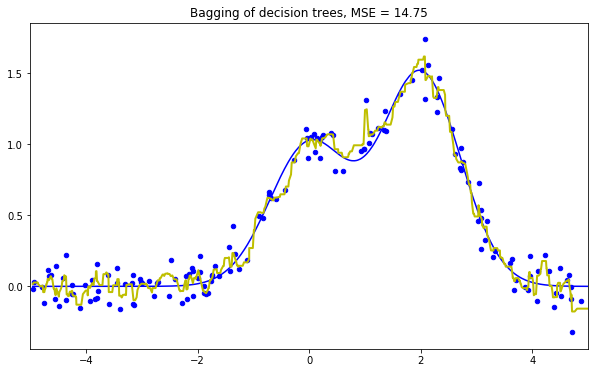

In [8]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
np.random.seed(42)

n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), n_samples)
    samples = data[indices]
    return samples

dtrees_bagging = []
def bagging_fit(X, y, n_trees=10, samples_share=1.5):
    dtrees_bagging.clear()
    full_X_y = np.array(list(zip(np.array(X)[:, 0], y)))
    for t in range(n_trees):
        samp_X_y = get_bootstrap_samples(
            full_X_y, 
            int(len(full_X_y) / samples_share)
        )
        X_new = samp_X_y[:, 0].reshape((len(samp_X_y), 1))
        y_new = samp_X_y[:, 1]
        dtrees_bagging.append(DecisionTreeRegressor().fit(X_new, y_new))


def bagging_predict(X):
    d_predicts = []
    for dtree in dtrees_bagging:
        d_predicts.append(dtree.predict(X))
    d_predicts = np.array(d_predicts)
    return np.mean(d_predicts, axis=0)
    
bagging_fit(X_train, y_train)
bdt_predict = bagging_predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging of decision trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

##### Задание 4.

На занятии мы не успели попрактиковаться в построении алгоритма машинного обучения на основе RandomForest. Предлагается вам самостоятельно обучить `RandomForestRegressor` на той же самой сгенерированной выборке, что и в коде выше.

Вам необходимо самостоятельно разобраться, какие параметры принимает на вход функция. Документация: https://scikit-learn.org/0.20/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Подберите оптимальное число деревьев (n_estimators) и глубину деревьев (max_depth) в RandomForest, аналогично тому, как вы сделали это в задании 3.

Какой алгоритм в оптимуме отработал лучше? Bagging или RandomForest?

##### Задание 5.

1. Замените функцию `np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)` в задании 3 на более сложную:  
`1/10 * (ln(x)/2)**sin(x)` в диапазоне `27 > x > 16` (https://snob.ru/selected/entry/8779)
2. Увеличьте шум.

Проделайте те же самые шаги - обучите обычное дерево решений, бэггинг деревьев решение и RandomForest. Сравните метрики. Насколько они отличаются от того, что получилось в задании 3 и 4?